In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("youtube_dataset.csv")df

,Video Name,Channel Name,Comment Id,User Name,Comment,Date,Likes
0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgwV0tapZzaFxdYm1z14AaABAg,GAMIT yuvraj,The people who liked this comment is officiall...,2020-08-10T20:00:43Z,98280
1,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgyiccblP3A16aixpit4AaABAg,MrCrazy,"- Wait, it's 7B views\n- Always has been",2020-09-07T20:52:36Z,773
2,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,Ugx7THW3EBNJlhJuwSB4AaABAg,60K Subs With 1 Video Challenge,*Teacher: What is the population of the Earth?...,2019-11-21T03:23:32Z,356081
3,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgzXUsI6yrRjTKNASf94AaABAg,Srivathsa D,Let's be honest this wasn't your recommendatio...,2020-09-09T03:41:34Z,13
4,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,UgxCu6mywg6uqjueHQ14AaABAg,1k Subscribers Challenge Without Any Video,Types Of People:\n10% Enjoying Song \n90% Chec...,2020-09-08T09:53:24Z,122
...,...,...,...,...,...,...,...
19295,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxqlnG8nQ36eDoXKbJ4AaABAg,KineZ,Claim your “before 1 billion” certificate here,2020-07-28T18:39:38Z,5087
19296,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgwZsgM-0pn9tiFxmOh4AaABAg,varun raj,This means that you are before 1 billion views.,2020-09-09T11:41:30Z,6
19297,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,UgxeBmhoyhSILM0HPux4AaABAg,hey harry,We won't have school till 2021 \nMay God help ...,2020-09-09T10:03:04Z,5
19298,ZAYN - PILLOWTALK (Official Music Video),ZaynVEVO,Ugy6KVBjdz7Rj2yxTER4AaABAg,Jannat EXO-L,Literally saw this song from 1M -> 996M,2020-09-08T19:41:18Z,4


In [3]:
#checking for null values
df.isnull().sum()

Video Name      0
Channel Name    0
Comment Id      0
User Name       1
Comment         0
Date            0
Likes           0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Video Name      0
Channel Name    0
Comment Id      0
User Name       0
Comment         0
Date            0
Likes           0
dtype: int64

In [6]:
df["Video Name"]


0         Luis Fonsi - Despacito ft. Daddy Yankee
1         Luis Fonsi - Despacito ft. Daddy Yankee
2         Luis Fonsi - Despacito ft. Daddy Yankee
3         Luis Fonsi - Despacito ft. Daddy Yankee
4         Luis Fonsi - Despacito ft. Daddy Yankee
                           ...                   
19295    ZAYN - PILLOWTALK (Official Music Video)
19296    ZAYN - PILLOWTALK (Official Music Video)
19297    ZAYN - PILLOWTALK (Official Music Video)
19298    ZAYN - PILLOWTALK (Official Music Video)
19299    ZAYN - PILLOWTALK (Official Music Video)
Name: Video Name, Length: 19299, dtype: object

In [7]:
df.columns

Index(['Video Name', 'Channel Name', 'Comment Id', 'User Name', 'Comment',
       'Date', 'Likes'],
      dtype='object')

In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#preprocess the comments
def preprocess_comment(comment):
    #comment to lowercase
    comment=comment.lower();
    #remove websites
    comment=re.sub(r'http\S+','',comment)
    #remove  whitespace
    comment=comment.strip()
    #remove punctuations
    comment=comment.translate(str.maketrans('','',string.punctuation))
    #remove numbers
    comment=re.sub(r'\d','',comment)
    comment=re.sub(r'\n','',comment)
    stop_words = set(stopwords.words('english'))
    comment = ' '.join([word for word in comment.split() if word not in stop_words])
    return comment

df['Sorted_comments']=df['Comment'].apply(preprocess_comment)
print(df['Comment'])
    

[nltk_data] Downloading package stopwords to C:\Users\Pranjal
[nltk_data]     Arote\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        The people who liked this comment is officiall...
1                 - Wait, it's 7B views\n- Always has been
2        *Teacher: What is the population of the Earth?...
3        Let's be honest this wasn't your recommendatio...
4        Types Of People:\n10% Enjoying Song \n90% Chec...
                               ...                        
19295       Claim your “before 1 billion” certificate here
19296      This means that you are before 1 billion views.
19297    We won't have school till 2021 \nMay God help ...
19298              Literally saw this song from 1M -> 996M
19299    Podría escuchar esta canción la misma cantidad...
Name: Comment, Length: 19299, dtype: object


In [16]:
print(df['Sorted_comments'])

0                  people liked comment officially b views
1                                      wait b views always
2          teacher population earthme around one despacito
3                lets honest wasnt recommendation searched
4                types people enjoying song checking views
                               ...                        
19295                   claim “before billion” certificate
19296                                  means billion views
19297                        wont school till may god help
19298                                   literally saw song
19299    podría escuchar esta canción la misma cantidad...
Name: Sorted_comments, Length: 19299, dtype: object


In [17]:
#Perform Sentiment Analysis
from textblob import TextBlob
def analyze_sentiment(comment):
    analysis=TextBlob(comment)
    sentiment=analysis.sentiment.polarity
    return sentiment

#apply sentiment analysis to the cleaned comment
df['sentiment']=df['Sorted_comments'].apply(analyze_sentiment)

In [18]:
print(df['sentiment'])

0        0.6
1        0.0
2        0.0
3        0.6
4        0.5
        ... 
19295    0.0
19296    0.0
19297    0.0
19298    0.0
19299    0.0
Name: sentiment, Length: 19299, dtype: float64


In [19]:
def categorize_sentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df['Sentiment_Category'] = df['sentiment'].apply(categorize_sentiment)

# Display the first few rows of the dataset with sentiment categories
print(df[['sentiment', 'Sentiment_Category']].head())

   sentiment Sentiment_Category
0        0.6           Positive
1        0.0            Neutral
2        0.0            Neutral
3        0.6           Positive
4        0.5           Positive


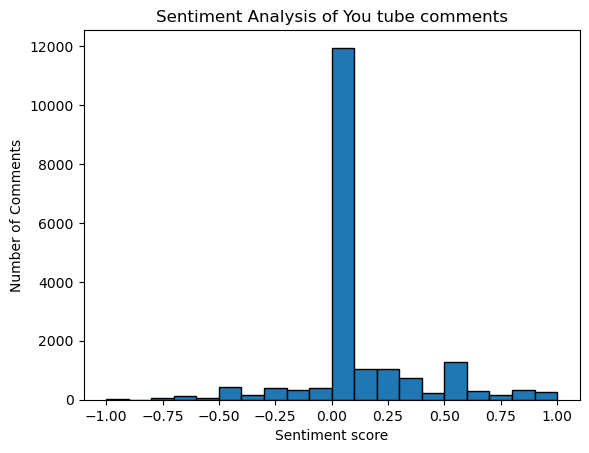

In [20]:
#Analyze and visualize the Results
import matplotlib.pyplot as plt
def plot_sentiments(sentiments):
    plt.hist(sentiments,bins=20,edgecolor='black')
    plt.title('Sentiment Analysis of You tube comments')
    plt.xlabel('Sentiment score')
    plt.ylabel('Number of Comments')
    plt.show()

plot_sentiments(df['sentiment'])

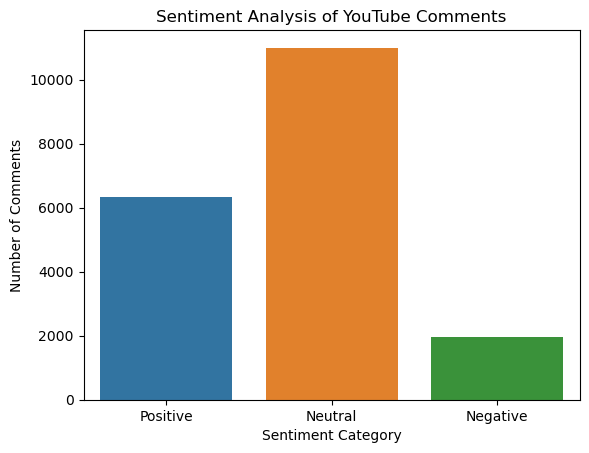

In [21]:
import seaborn as sns
sns.countplot(x='Sentiment_Category', data=df)
plt.title('Sentiment Analysis of YouTube Comments')
plt.xlabel('Sentiment Category')
plt.ylabel('Number of Comments')
plt.show()